In [ ]:
import pandas as pd

def em_worker_quality(rows, labels):
  worker = {}

  for _, r in rows.iterrows():
    wrkr = r['WorkerId']
    profile = r['Input.profile1']
    p1 = r['Input.profile2']
    p2 = r['Input.profile3']
    p3 = r['Input.profile4']
    p4 = r['Input.profile5']
    p5 = r['Input.profile6']
    r1 = r['Answer.rating1']
    r2 = r['Answer.rating2']
    r3 = r['Answer.rating3']
    r4 = r['Answer.rating4']
    r5 = r['Answer.rating5']


    if worker.get(wrkr) == None:
      worker.update({wrkr: {"match_match": 0.0, "match_notmatch": 0.0, 
                            "notmatch_notmatch": 0.0, "notmatch_match": 0.0}})
    # rating of 3 and 4 means a match
    if r1 in [3, 4]:
      if labels[(profile, p1)]["match"] == 1.0:
        worker[wrkr]["match_match"] += 1.0
      elif labels[(profile, p1)]["notmatch"] == 1.0:
        worker[wrkr]["notmatch_match"] += 1.0
    # rating of 1 and 2 means a NO match
    elif r1 in [1, 2]:
      if labels[(profile, p1)]["match"] == 1.0:
        worker[wrkr]["match_notmatch"] += 1.0
      elif labels[(profile, p1)]["notmatch"] == 1.0:
        worker[wrkr]["notmatch_notmatch"] += 1.0
    
    # rating of 3 and 4 means a match
    if r2 in [3, 4]:
      if labels[(profile, p2)]["match"] == 1.0:
        worker[wrkr]["match_match"] += 1.0
      elif labels[(profile, p2)]["notmatch"] == 1.0:
        worker[wrkr]["notmatch_match"] += 1.0
    # rating of 1 and 2 means a NO match
    elif r2 in [1, 2]:
      if labels[(profile, p2)]["match"] == 1.0:
        worker[wrkr]["match_notmatch"] += 1.0
      elif labels[(profile, p2)]["notmatch"] == 1.0:
        worker[wrkr]["notmatch_notmatch"] += 1.0
    
    # rating of 3 and 4 means a match
    if r3 in [3, 4]:
      if labels[(profile, p3)]["match"] == 1.0:
        worker[wrkr]["match_match"] += 1.0
      elif labels[(profile, p3)]["notmatch"] == 1.0:
        worker[wrkr]["notmatch_match"] += 1.0
    # rating of 1 and 2 means a NO match
    elif r3 in [1, 2]:
      if labels[(profile, p3)]["match"] == 1.0:
        worker[wrkr]["match_notmatch"] += 1.0
      elif labels[(profile, p3)]["notmatch"] == 1.0:
        worker[wrkr]["notmatch_notmatch"] += 1.0
    
    # rating of 3 and 4 means a match
    if r4 in [3, 4]:
      if labels[(profile, p4)]["match"] == 1.0:
        worker[wrkr]["match_match"] += 1.0
      elif labels[(profile, p4)]["notmatch"] == 1.0:
        worker[wrkr]["notmatch_match"] += 1.0
    # rating of 1 and 2 means a NO match
    elif r4 in [1, 2]:
      if labels[(profile, p4)]["match"] == 1.0:
        worker[wrkr]["match_notmatch"] += 1.0
      elif labels[(profile, p4)]["notmatch"] == 1.0:
        worker[wrkr]["notmatch_notmatch"] += 1.0
    
    # rating of 3 and 4 means a match
    if r5 in [3, 4]:
      if labels[(profile, p5)]["match"] == 1.0:
        worker[wrkr]["match_match"] += 1.0
      elif labels[(profile, p5)]["notmatch"] == 1.0:
        worker[wrkr]["notmatch_match"] += 1.0
    # rating of 1 and 2 means a NO match
    elif r5 in [1, 2]:
      if labels[(profile, p5)]["match"] == 1.0:
        worker[wrkr]["match_notmatch"] += 1.0
      elif labels[(profile, p5)]["notmatch"] == 1.0:
        worker[wrkr]["notmatch_notmatch"] += 1.0
  
  for w, matrix in worker.items():
    
    t_match = matrix["match_match"] + matrix["match_notmatch"]
    if t_match != 0.0:
      matrix["match_match"] = matrix["match_match"] / t_match
      matrix["match_notmatch"] = matrix["match_notmatch"] / t_match

    t_nmatch = matrix["notmatch_notmatch"] + matrix["notmatch_match"]
    if t_nmatch != 0.0:
      matrix["notmatch_notmatch"] = matrix["notmatch_notmatch"] / t_nmatch
      matrix["notmatch_match"] = matrix["notmatch_match"] / t_nmatch
    else:
      print(w)
  return worker

def em_votes(rows, worker_qual):
    labels = {}
    for _, r in rows.iterrows():
      wrkr = r['WorkerId']
      profile = r['Input.profile1']
      p1 = r['Input.profile2']
      p2 = r['Input.profile3']
      p3 = r['Input.profile4']
      p4 = r['Input.profile5']
      p5 = r['Input.profile6']
      r1 = r['Answer.rating1']
      r2 = r['Answer.rating2']
      r3 = r['Answer.rating3']
      r4 = r['Answer.rating4']
      r5 = r['Answer.rating5']

      if labels.get((profile, p1)) == None:
        labels.update({(profile, p1): {"match": 0.0, "notmatch": 0.0}})
      if labels.get((profile, p2)) == None:
        labels.update({(profile, p2): {"match": 0.0, "notmatch": 0.0}})
      if labels.get((profile, p3)) == None:
        labels.update({(profile, p3): {"match": 0.0, "notmatch": 0.0}})
      if labels.get((profile, p4)) == None:
        labels.update({(profile, p4): {"match": 0.0, "notmatch": 0.0}})
      if labels.get((profile, p5)) == None:
        labels.update({(profile, p5): {"match": 0.0, "notmatch": 0.0}})
    
      if r1 in [3, 4]:
          labels[(profile, p1)]["match"]+= worker_qual[wrkr]["match_match"] * int(r1)
          labels[(profile, p1)]["notmatch"] += worker_qual[wrkr]["notmatch_match"] * int(r1)
      elif r1 in [1, 2]:
          labels[(profile, p1)]["notmatch"] += worker_qual[wrkr]["notmatch_notmatch"] * int(r1)
          labels[(profile, p1)]["match"] += worker_qual[wrkr]["match_notmatch"] * int(r1)
      if r2 in [3, 4]:
          labels[(profile, p2)]["match"]+= worker_qual[wrkr]["match_match"] * int(r2)
          labels[(profile, p2)]["notmatch"] += worker_qual[wrkr]["notmatch_match"] * int(r2)
      elif r2 in [1, 2]:
          labels[(profile, p2)]["notmatch"] += worker_qual[wrkr]["notmatch_notmatch"] * int(r2)
          labels[(profile, p2)]["match"] += worker_qual[wrkr]["match_notmatch"] * int(r2)
      if r3 in [3, 4]:
          labels[(profile, p3)]["match"]+= worker_qual[wrkr]["match_match"] * int(r3)
          labels[(profile, p3)]["notmatch"] += worker_qual[wrkr]["notmatch_match"] * int(r3)
      elif r3 in [1, 2]:
          labels[(profile, p3)]["notmatch"] += worker_qual[wrkr]["notmatch_notmatch"] * int(r3)
          labels[(profile, p3)]["match"] += worker_qual[wrkr]["match_notmatch"] * int(r3)
      if r4 in [3, 4]:
          labels[(profile, p4)]["match"]+= worker_qual[wrkr]["match_match"] * int(r4)
          labels[(profile, p4)]["notmatch"] += worker_qual[wrkr]["notmatch_match"] * int(r4)
      elif r4 in [1, 2]:
          labels[(profile, p4)]["notmatch"] += worker_qual[wrkr]["notmatch_notmatch"] * int(r4)
          labels[(profile, p4)]["match"] += worker_qual[wrkr]["match_notmatch"] * int(r4)
      if r5 in [3 ,4]:
          labels[(profile, p5)]["match"]+= worker_qual[wrkr]["match_match"] * int(r5)
          labels[(profile, p5)]["notmatch"] += worker_qual[wrkr]["notmatch_match"] * int(r5)
      elif r5 in [1, 2]:
          labels[(profile, p5)]["notmatch"] += worker_qual[wrkr]["notmatch_notmatch"] * int(r5)
          labels[(profile, p5)]["match"] += worker_qual[wrkr]["match_notmatch"] * int(r5)
    
    maj_labels = {}
    for pair, val in labels.items():
      if val["notmatch"] > val["match"]:
        maj_labels.update({pair: {"match": 0.0, "notmatch": 1.0}})
      else:
        maj_labels.update({pair: {"match": 1.0, "notmatch": 0.0}})
    
    return maj_labels
    

def em_iteration(rows, worker_qual):
    labels = em_votes(rows, worker_qual)
    worker_qual = em_worker_quality(rows, labels)
    return labels, worker_qual

def em_vote(rows, iter_num):
  worker_qual = {}
  for _, row in rows.iterrows():
    wrkr = row['WorkerId']
    if worker_qual.get(wrkr) == None:
      worker_qual.update({wrkr: {"match_match": 1.0, "match_notmatch": 0.0, 
                                    "notmatch_notmatch": 1.0, "notmatch_match": 0.0}})
  
  wrkr_ql = worker_qual
  labels = ""
  for i in range(iter_num):
      (l, w_ql) = em_iteration(rows, wrkr_ql) 

      wrkr_ql = w_ql
      labels = l

  final = []
  for pair, val in labels.items():
    if val["match"] == 1.0:
      final.append((pair[0],pair[1], "match"))
    else:
      final.append((pair[0], pair[1], "notmatch"))

  final.sort()

  df1 = pd.DataFrame(wrkr_ql)
  return final,df1

In [ ]:
 #EM algorithm

def main():
  mturk_data = pd.read_csv('/content/NETS213 FinalProjData.csv')
  info5 = em_vote(mturk_data, 3)[0]
  df = em_vote(mturk_data, 3)[1]
  df.to_csv('worker_ql.csv', index=False)
  df5 = pd.DataFrame(info5)
  df5.to_csv('output5.csv', index = False)

if __name__ == '__main__':
    main()

In [ ]:
mturk_data = pd.read_csv('/content/NETS213 FinalProjData.csv')
info = em_vote(mturk_data, 3)[0]
df = em_vote(mturk_data, 3)[1]
df.to_csv('worker_ql.csv', index=False)
df2 = pd.DataFrame(info)
df2.to_csv('output2.csv', index = False)

A2HDCSPSMKB2WG
A3W2CQT1M9GEL
A3BS891GDX2MZS
A1WT9J6TTJDLKN
A377PON9N4JZEY
A34T4R7G25LDJM
A1936LUSP0IU9P
A3LYKC6UUYWBNW
A1BZNPQ0H7ZSER
A3IXJO2X4M1D7U
A1E8VY6G6VFBB9
A3ICFB5LP54FO2
A2NT5QSDTUUHOA
AVIEE6LDH0BT5
A2TWIZXBZLCMNM
A1OSPGFZVR6MFZ
A10MU8Y8F3J4QF
A3HF4FOT5XOZKU
A2RLSRUHS830A7
A1KOBLL83SICGQ
A13GUTDMGGZZDL
A37JC45Y9GLSA7
A26MN6JIKD4NXU
A29AML7RI4I0NT
A3PDR75KYPYK4Z
A2235UABD5PUJX
A2Q5PKTM9AMQHJ
A2AOMO4290G7Q6
A3S0C974DF3EJY
A2HDCSPSMKB2WG
A3W2CQT1M9GEL
A3BS891GDX2MZS
A1WT9J6TTJDLKN
A377PON9N4JZEY
A34T4R7G25LDJM
A1936LUSP0IU9P
A3LYKC6UUYWBNW
A1BZNPQ0H7ZSER
A3IXJO2X4M1D7U
A1E8VY6G6VFBB9
A3ICFB5LP54FO2
A2NT5QSDTUUHOA
AVIEE6LDH0BT5
A2TWIZXBZLCMNM
A1OSPGFZVR6MFZ
A10MU8Y8F3J4QF
A3HF4FOT5XOZKU
A2RLSRUHS830A7
A1KOBLL83SICGQ
A13GUTDMGGZZDL
A37JC45Y9GLSA7
A26MN6JIKD4NXU
A29AML7RI4I0NT
A3PDR75KYPYK4Z
A2235UABD5PUJX
A2Q5PKTM9AMQHJ
A2AOMO4290G7Q6
A3S0C974DF3EJY
A2HDCSPSMKB2WG
A3W2CQT1M9GEL
A3BS891GDX2MZS
A1WT9J6TTJDLKN
A377PON9N4JZEY
A34T4R7G25LDJM
A1936LUSP0IU9P
A3LYKC6UUYWBNW
A1BZNPQ0H7ZSER


In [ ]:
#df.shape
df = df.transpose()

In [ ]:
df

,match_match,match_notmatch,notmatch_notmatch,notmatch_match
A17GHP8L89ZSD5,0.678261,0.321739,0.675000,0.325000
A2IUT0610X9CV0,0.538462,0.461538,0.909091,0.090909
A7UNIWDAQROJG,0.737288,0.262712,0.750000,0.250000
A32DRYN7M7HIZT,0.537879,0.462121,0.526316,0.473684
A3746TDKYH8SJ9,0.632911,0.367089,0.789474,0.210526
...,...,...,...,...
A2AOMO4290G7Q6,0.600000,0.400000,0.000000,0.000000
A3S0C974DF3EJY,0.600000,0.400000,0.000000,0.000000
A1G6DFTYUM578N,1.000000,0.000000,1.000000,0.000000
A14Y02GIRS0IRW,0.000000,1.000000,1.000000,0.000000


In [ ]:
tot1 = 0
tot2 = 0
tot3 = 0
tot4 = 0

m1 = 0
m2 = 0

for index, row in df.iterrows():
  if row[0] + row[1] == 0:
    m1 = m1 + 1
  if row[2] + row[3] == 0:
    m2 = m2 + 1
  tot1 = tot1 + row[0]
  tot2 = tot2 + row[1]
  tot3 = tot3 + row[2]
  tot4 = tot4 + row[3]

print(tot1 / (92 - m1))
print(tot2 / (92 - m1))
print(tot3 / (92 - m2))
print(tot4 / (92 - m2))

0.5821286284958669
0.41787137150413317
0.8100403064485414
0.18995969355145859


In [ ]:
0.5821286285 + 0.8100403064485414

1.3921689349485415

In [ ]:
0.41787137150413317 + 0.18995969355145859

0.6078310650555918

In [ ]:
l = []
for i, row in df.iterrows():
  sum = 0
  cnt = 0
  if row[0] + row[1] != 0:
    sum = sum + row[0]
    cnt = cnt + 1
  
  if row[2] + row[3] != 0:
    sum = sum + row[2]
    cnt = cnt + 1

  l.append(sum / cnt)

df['averaged_quality'] = l
df

,match_match,match_notmatch,notmatch_notmatch,notmatch_match,averaged_quality
A17GHP8L89ZSD5,0.678261,0.321739,0.675000,0.325000,0.676630
A2IUT0610X9CV0,0.538462,0.461538,0.909091,0.090909,0.723776
A7UNIWDAQROJG,0.737288,0.262712,0.750000,0.250000,0.743644
A32DRYN7M7HIZT,0.537879,0.462121,0.526316,0.473684,0.532097
A3746TDKYH8SJ9,0.632911,0.367089,0.789474,0.210526,0.711193
...,...,...,...,...,...
A2AOMO4290G7Q6,0.600000,0.400000,0.000000,0.000000,0.600000
A3S0C974DF3EJY,0.600000,0.400000,0.000000,0.000000,0.600000
A1G6DFTYUM578N,1.000000,0.000000,1.000000,0.000000,1.000000
A14Y02GIRS0IRW,0.000000,1.000000,1.000000,0.000000,0.500000


(array([ 1.,  0.,  0.,  0.,  2.,  2.,  0.,  1.,  0.,  5.,  4., 13.,  3.,
         9.,  1.,  5.,  3.,  5., 11.,  6.,  4.,  0., 17.]),
 array([0.        , 0.04347826, 0.08695652, 0.13043478, 0.17391304,
        0.2173913 , 0.26086957, 0.30434783, 0.34782609, 0.39130435,
        0.43478261, 0.47826087, 0.52173913, 0.56521739, 0.60869565,
        0.65217391, 0.69565217, 0.73913043, 0.7826087 , 0.82608696,
        0.86956522, 0.91304348, 0.95652174, 1.        ]),
 <a list of 23 Patch objects>)

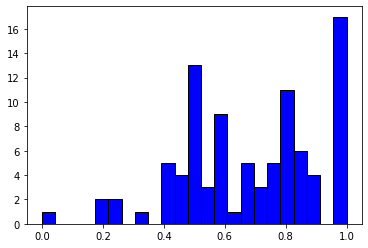

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['averaged_quality'], color = 'blue', edgecolor = 'black',
         bins = int(92/4))

In [ ]:
tot_match = 0
tot_nmatch = 0
for index, row in df2.iterrows():
  if row[2] == 'match':
    tot_match = tot_match + 1
  if row[2] == 'notmatch':
    tot_nmatch = tot_nmatch + 1

print(tot_match)
print(tot_nmatch)

386
114


Text(0, 0.5, 'F1 Score')

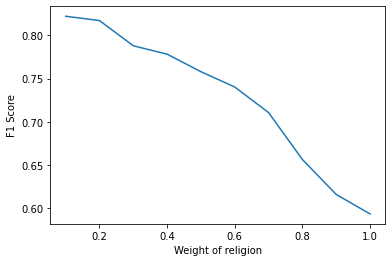

In [21]:
import matplotlib.pyplot as plt
x = [x*0.1 for x in range(1, 11)]
y = [0.8220064724919094, 0.8169934640522876, 0.7878787878787878, 0.7781569965870307, 0.7578947368421054, 0.7402135231316727, 0.7106227106227105, 0.6563706563706564, 0.6160000000000001, 0.5934959349593496]
plt.plot(x, y)
plt.xlabel('Weight of religion')
plt.ylabel('F1 Score')

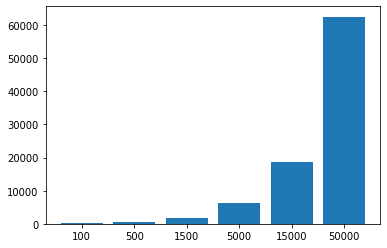

In [20]:
x = ['100', '500', '1500', '5000', '15000', '50000']
y = [125, 625, 1875, 6250, 18750, 62500]
plt.bar(x, y)
plt.show()